# Clustering and Dimensionality Reduction
In the last class, we described the basics of feature engineering--the process of choosing a numerical representation for your data. The techniques that we chose were mostly about defining meaningful correlation relationships between variables. Next, we will explore two other types of multi-variable relationships: low dimensional and clustering. 

## Dimensionality Reduction
How do we summarize a very wide set of observations into a small number of key factors? Principal component analysis (PCA) is a statistical procedure to convert a set of observations of correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors (each being a linear combination of the variables and containing n observations) are an uncorrelated orthogonal basis set. 

Let's work with an example dataset to make this a bit more clear. We have a dataset of world flag descriptions.

In [47]:
import pandas as pd
flag = pd.read_csv('flag.csv',index_col='name')
flag

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,3,5,1,1,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
Albania,0,0,3,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
Algeria,2,0,3,1,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
American-Samoa,0,0,5,1,0,1,1,1,0,1,...,0,0,0,0,0,0,1,1,1,0
Andorra,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western-Samoa,0,0,3,1,0,1,0,1,0,0,...,0,0,0,1,5,0,0,0,0,0
Yugoslavia,0,3,4,1,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Zaire,0,0,4,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0


The dataset lists out all of the countries of the world and different properties about their national flags. For example, we can find all of the flags that have crescents:

In [51]:
flag[flag['red'] > 0]

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,3,5,1,1,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
Albania,0,0,3,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0
Algeria,2,0,3,1,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,0
American-Samoa,0,0,5,1,0,1,1,1,0,1,...,0,0,0,0,0,0,1,1,1,0
Andorra,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western-Samoa,0,0,3,1,0,1,0,1,0,0,...,0,0,0,1,5,0,0,0,0,0
Yugoslavia,0,3,4,1,0,1,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Zaire,0,0,4,1,1,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0


or all of the flags that have both green and black:

In [52]:
flag[ (flag['green'] == 1) & (flag['black'] == 1)]

,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,3,5,1,1,0,1,1,1,0,...,0,0,0,0,1,0,0,1,0,0
Belize,0,2,8,1,1,1,1,1,1,1,...,1,0,0,0,0,0,0,1,1,1
Bermuda,0,0,6,1,1,1,1,1,1,0,...,1,1,1,1,0,0,0,1,1,0
Cape-Verde-Islands,1,2,5,1,1,0,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
Dominica,0,0,6,1,1,1,1,1,1,0,...,1,0,0,0,10,0,0,0,1,0
Ghana,0,3,4,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Guinea-Bissau,1,2,4,1,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Guyana,0,0,5,1,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
Iraq,0,3,4,1,1,0,0,1,1,0,...,0,0,0,0,3,0,0,0,0,0


There is one variable that we will have clean up before we proceed further. That describes the primary color of the flag.

In [53]:
print(flag['mainhue'][:5])

#Add a 1-hot encoded column that represents each main hue
for hue in flag['mainhue'].unique():
    flag['mainhue_'+hue]  = 1*(flag['mainhue'] == hue)

flag = flag.drop(columns=['mainhue'])
flag[:5]

name
Afghanistan       green
Albania             red
Algeria           green
American-Samoa     blue
Andorra            gold
Name: mainhue, dtype: object


,bars,stripes,colours,red,green,blue,gold,white,black,orange,...,animate,text,mainhue_green,mainhue_red,mainhue_blue,mainhue_gold,mainhue_white,mainhue_orange,mainhue_black,mainhue_brown
name,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,3,5,1,1,0,1,1,1,0,...,0,0,1,0,0,0,0,0,0,0
Albania,0,0,3,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
Algeria,2,0,3,1,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
American-Samoa,0,0,5,1,0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,0
Andorra,3,0,3,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


This dataset has a lot of variables and a relatively few number of observations. Are all the variables equally informative? 

To answer this question, let's think about what informative means. Which of the following columns is more interesting to a data scientist: a column of all 1's or a column that varies a lot. 

Convince yourself that we want columns that vary a lot--ones that "explain" differences between the observed data. Suppose, we calculate the standard deviation of each attribute to measure this variance:

In [19]:
flag.std()

bars              1.038339
stripes           2.328005
colours           1.300154
red               0.409315
green             0.500334
blue              0.501187
gold              0.500334
white             0.432631
black             0.444085
orange            0.341556
circles           0.463075
crosses           0.385387
saltires          0.290879
quarters          0.435860
sunstars          4.396186
crescent          0.231869
triangle          0.347025
icon              0.435615
animate           0.401808
text              0.275798
mainhue_green     0.367363
mainhue_red       0.482950
mainhue_blue      0.405612
mainhue_gold      0.298000
mainhue_white     0.317904
mainhue_orange    0.142471
mainhue_black     0.158868
mainhue_brown     0.101271
dtype: float64

Is this accurate? Why might "stars" be the highest variance column? 

Making variance comparisons between columns that have different scaling properties is faulty. So we always have to "normalize" our data, when doing such kind of analysis.

In [54]:
#scale all variables to be between 0 and 1
#iterate through all columns
for c in flag.columns:
    flag[c] = (flag[c]-flag[c].min())/(flag[c].max() - flag[c].min())
    #we know the min val for all is 0

flag.std().sort_values()

sunstars          0.087924
mainhue_brown     0.101271
quarters          0.108965
circles           0.115769
mainhue_orange    0.142471
mainhue_black     0.158868
stripes           0.166286
colours           0.185736
crosses           0.192693
bars              0.207668
crescent          0.231869
text              0.275798
saltires          0.290879
mainhue_gold      0.298000
mainhue_white     0.317904
orange            0.341556
triangle          0.347025
mainhue_green     0.367363
animate           0.401808
mainhue_blue      0.405612
red               0.409315
white             0.432631
icon              0.435615
black             0.444085
mainhue_red       0.482950
gold              0.500334
green             0.500334
blue              0.501187
dtype: float64

This analysis tells us which single columns are the most informative but what about combinations of columns? Two columns can be exactly correlated to each other but vary a lot individually. This leads to the idea of Principal Component Analysis. The precise math is beyond the scope of this class (better for a machine learning class) but the basic intuition is that the algorithm searches for weighted averages of columns that have the highest variance. One it finds the best one, it finds the next best weighted average subject to that combination being uncorrelated with the first, and so on and so forth. 

To apply PCA, we will use the scikit-learn package. The first thing that we will have to do is to convert the data into a numpy array (array of numbers).

In [55]:
import numpy as np

X = flag.to_numpy()
X

array([[0.        , 0.21428571, 0.57142857, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       [0.4       , 0.        , 0.28571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [0.6       , 0.        , 0.42857143, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.5       , 0.57142857, ..., 0.        , 0.        ,
        0.        ]])

Then, we use the PCA module for the scikit-learn package to fit a PCA model to the data.

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) #find 2 principal components
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

This process outputs a few different things. First, it computes two weighted averages of columns called the principal components--you can think of these as the "axes" over which the data varies the most:

In [57]:
pc1, pc2 = pca.components_

weights1 = list(zip(pc1, flag.columns))
weights1.sort()

print('Principal Component 1: \n (Negative)',weights1[:5], '\n\n (Positive)' ,weights1[-5:])

print()
print()

weights2 = list(zip(pc2, flag.columns))
weights2.sort()

print('Principal Component 2: \n (Negative)',weights2[:5], '\n\n (Positive)' ,weights2[-5:])

Principal Component 1: 
 (Negative) [(-0.2659816028533505, 'white'), (-0.25452500904979364, 'blue'), (-0.12941798418053677, 'mainhue_white'), (-0.11252535114809306, 'mainhue_blue'), (-0.04528345460086802, 'mainhue_red')] 

 (Positive) [(0.2867829693680826, 'icon'), (0.29186803466547395, 'black'), (0.301800611052263, 'animate'), (0.4487057346308544, 'green'), (0.4967532787453514, 'gold')]


Principal Component 2: 
 (Negative) [(-0.32844892829767997, 'mainhue_red'), (-0.15207728098211426, 'red'), (-0.09375885566128271, 'black'), (-0.08865119493564189, 'mainhue_green'), (-0.054591826848101876, 'green')] 

 (Positive) [(0.21398865775168574, 'orange'), (0.23418896594610347, 'animate'), (0.2884050701959082, 'icon'), (0.4317407484665297, 'mainhue_blue'), (0.5414664420892669, 'blue')]


Then, the model also returns an explained variance (how much of the variance these two components explain) 100% is the maximum. Given that there are 30 variables, it is quite significant that only 2 variables explain more than 30% of all the variation in the data.

In [24]:
print(pca.explained_variance_ratio_)

[0.17299924 0.15548248]


Finally, you can use this to perform a dimensionality reduction:

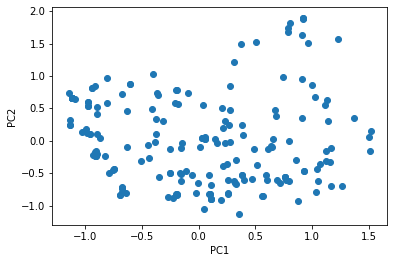

In [25]:
%matplotlib inline  

import matplotlib.pyplot as plt

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Let's try to interpret this figure a bit more. Let's see where all the "Baathist" Arab countries lie on this plot:

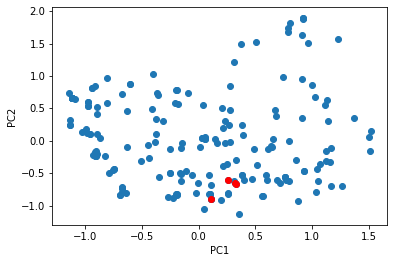

In [26]:
arab = ['Syria', 'Jordan', 'Kuwait', 'UAE']
arab_index = [list(flag.index.values).index(a) for a in arab]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[arab_index,0], Y[arab_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Or we can look at all of the countries in northern europe

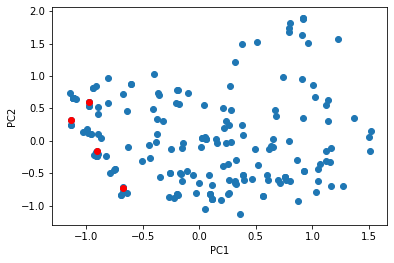

In [27]:
ne = ['Norway', 'Denmark', 'Finland', 'Iceland']
ne_index = [list(flag.index.values).index(a) for a in ne]
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[ne_index,0], Y[ne_index,1],color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Clustering
When we were playing around with the data we manually used data clusters that we roughly knew about to validate our model. How do we do this automatically? Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In particular, we will focus on a simple form of clustering called "k-means". k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

Again, the mathematical details are better left for a machine learning class but you can see how to use scikit-learn to do this. 

Suppose, we have a dataset of credit card customers and we want to break them into customer segments.

In [28]:
import pandas as pd
customers = pd.read_csv('cc.csv', index_col='CUST_ID')
customers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


First, let's clean up this data a bit. There are a few NaN numbers that we should remove from the dataset. There are a handful of customers that have not made any payments yet and we should set their minimum payments to 0.

In [62]:
customers = customers.fillna(0)

In [59]:
customers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.000000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


Now, lets featurize this data and visualize what we are working with. PCA is actually a great way to summarize very high dimensional data into a 2-d plot.

In [63]:
X = customers.to_numpy()

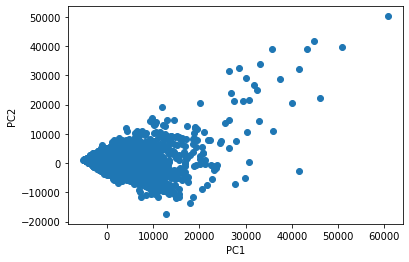

In [64]:
pca = PCA(n_components=2) #find 2 principal components
pca.fit(X)

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

There are clearly a couple of outliers! This is why we need to normalize the data.

In [65]:
from sklearn.preprocessing import normalize
X = normalize(X)

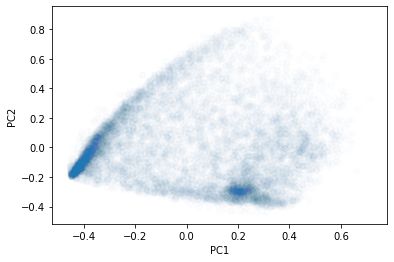

In [67]:
pca = PCA(n_components=2) #find 2 principal components
pca.fit(X)

Y = pca.transform(X)
plt.scatter(Y[:,0], Y[:,1],alpha=0.01)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

We can then identify clsuters in this data using kmeans.

In [68]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
Z = kmeans.fit_predict(X)
Z

array([3, 0, 3, ..., 3, 3, 1], dtype=int32)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

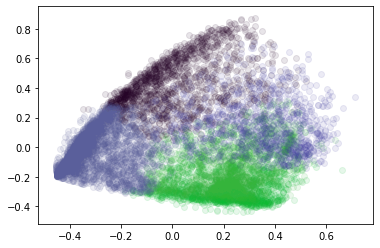

In [70]:
import random

for i in range(0,5):
    rgb = (random.random(), random.random(), random.random(),0.1)
    plt.scatter(Y[Z==i,0], Y[Z==i,1],c=rgb)